# Práctica mapeo percentual
España Tzec Jesús Manuel

In [1]:
library(corrplot)
library(nFactors)
library(psych)
library(dplyr)

Warning message:
"package 'corrplot' was built under R version 3.5.3"corrplot 0.84 loaded
Warning message:
"package 'nFactors' was built under R version 3.5.3"Loading required package: lattice

Attaching package: 'nFactors'

The following object is masked from 'package:lattice':

    parallel

Warning message:
"package 'psych' was built under R version 3.5.3"Warning message:
"package 'dplyr' was built under R version 3.5.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Para empezar hacemos la carga de los datos *cardata.csv* y vemos los primeros datos del conjunto

In [2]:
data <- read.csv('cardata.csv')
head(data)

ID,Education,Brand,Trendy,Styling,Sportiness,Reliability,Performance,Comfort,Preference
1,MBA,Acura,6,5,6,8,6,6,7
1,MBA,BMW,9,10,7,8,8,7,10
1,MBA,Cadillac,4,6,3,5,6,9,5
1,MBA,Lexus,6,7,2,9,7,8,8
1,MBA,Lincoln,4,5,1,5,5,9,4
1,MBA,Mercedes,8,9,5,8,9,8,9


Para poder explorar los datos, utilizamos una matriz de correlaciones

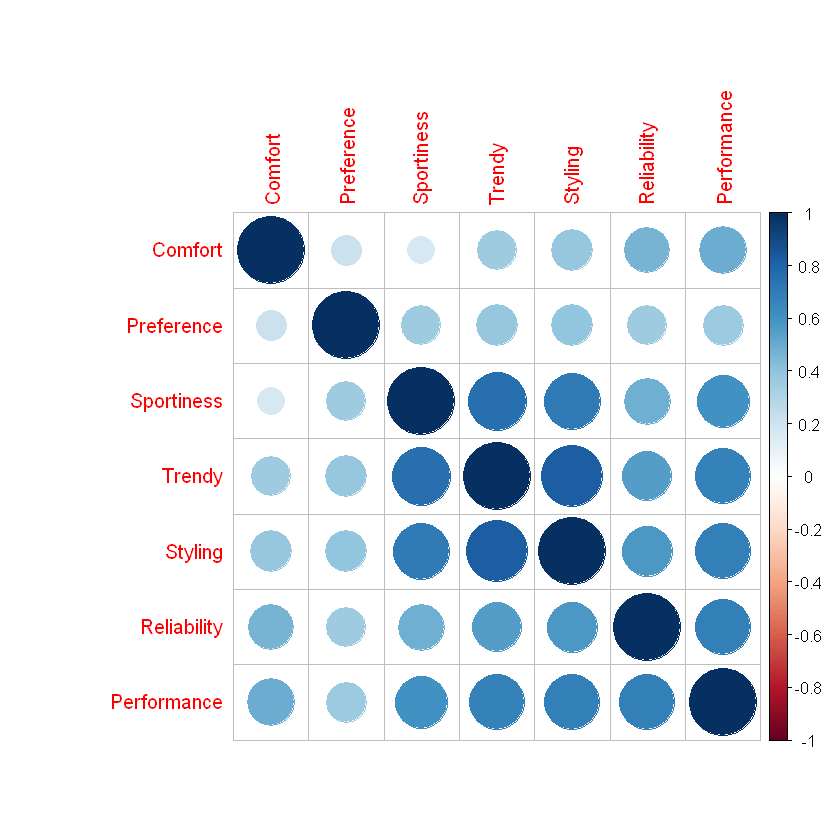

In [3]:
vars_manif <- data[,4:10] 
corrplot(cor(vars_manif), order = "hclust")

En la matriz de correclaciones se puede apreciar que hay un grupo que esta fuertemente correlacionado, y quizá un par más de grupos que están correlacionados pero no tanto.

Ahora procedemos a obtener los valores propios, debido a que la suma de los valores propios de la matriz de correlaciones es igual al número de variables manifiestas, entonces esto nos da un criterio frecuentemente utilizado para definir el número de factores es identificar cuántos valores propios de esta matriz son mayores a la unidad.
Entonces obtenemos los valores propios de la matriz de correlación anterior de las variables manifiestas.

In [4]:
eig <- eigen(cor(vars_manif))
eig$values

[1] 4.1076378 0.9383135 0.7627738 0.4742605 0.2799487 0.2715154 0.1655505

Se puede observar que solo un valor propio es mayor a uno, y eso no indica que las variables manifiestas se explican con un solo factor, como ya habíamos más o menos observado con la matriz de correlaciones. Para tener una vista más visual, procedemos a hacer una gráfica de la estructura de los valores propios.

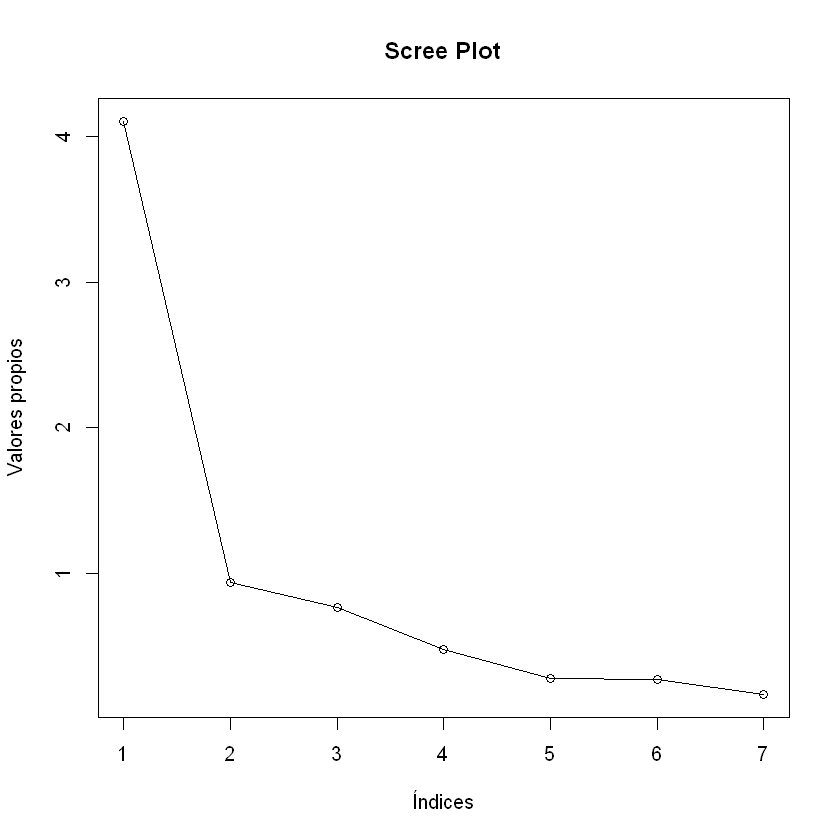

In [5]:
plot(eig$values, main="Scree Plot", t='l', ylab = "Valores propios", xlab="Índices")
points(eig$values)

Para estar completamente seguros de los resultado anteriores utilizamos la librería **nFactors**, que utiliza diferentes criterios y así obtener el número de factores.

In [6]:
nScree(vars_manif, cor=T)

  noc naf nparallel nkaiser
1   1   1         1       1

Todos los criterios nos dicen que las variables manifiestas se pueden explicar con un solo factor. Ahora que ya tenemos la cantidad de factores, asociamos las variables manifiestas con los factores, para eso, podemos revisar la correlación de cada variable manifiesta con los factores identificados y para eso usamos la librería **psych**.

In [7]:
fit <- principal(vars_manif,nfactors=1, rotate="varimax")

## 1.- Utiliza un número de factores que explique el 80% de la información en la matriz de correlaciones.

Utilizamos el atributo loadings para observar la correlación entre cada variable manifiesta.

In [8]:
fit$loadings


Loadings:
            PC1  
Trendy      0.880
Styling     0.883
Sportiness  0.791
Reliability 0.775
Performance 0.861
Comfort     0.544
Preference  0.537

                 PC1
SS loadings    4.108
Proportion Var 0.587

A primera vista nos damos cuenta que este factor solo explica el 58% de la información en la matriz de correlaciones. Entonces no se cumple el que se explique el 80% de la información en la matriz de correlaciones, por lo que nos vemos obligados a usar más factores para poder explicar ese 80% aunque los criterios anteriores nos indique que solo deberíamos usar uno.

In [9]:
fit <- principal(vars_manif,nfactors=2, rotate="varimax")
fit$loadings


Loadings:
            RC1   RC2  
Trendy      0.868 0.268
Styling     0.833 0.331
Sportiness  0.898      
Reliability 0.523 0.630
Performance 0.655 0.578
Comfort           0.929
Preference  0.527 0.168

                 RC1   RC2
SS loadings    3.240 1.806
Proportion Var 0.463 0.258
Cumulative Var 0.463 0.721

Ahora con dos factores observamos que solo llega a explicar el 72% de la información en la matriz de correlaciones, por lo que tenemos que seguir agregando factores.

## 2.- Asocia cada una de las variables manifiestas a los factores identificados e interprétalos.

In [10]:
fit <- principal(vars_manif,nfactors=3, rotate="varimax")
fit$loadings


Loadings:
            RC1   RC2   RC3  
Trendy      0.872 0.241 0.165
Styling     0.836 0.304 0.170
Sportiness  0.899       0.157
Reliability 0.511 0.611 0.188
Performance 0.663 0.557 0.151
Comfort           0.925      
Preference  0.220 0.129 0.966

                 RC1   RC2   RC3
SS loadings    3.024 1.708 1.076
Proportion Var 0.432 0.244 0.154
Cumulative Var 0.432 0.676 0.830

Con tres factores vemos que llegamos a explicar el 83% de la información. Ahora podemos apreciar que *Trendy*, *Styling* y *Sportiness* y se correlacionan fuertemente y *Performance* se correlaciona de manera decente con el primer factor que se llamara **Moda y Desempeño**. *Reliability* y *Comfort* se correlacionan con el segundo factor que se llamara **Conformidad y Confiablidad**. Y por último *Preference* se correlaciona muy fuertemente con el tercer factor que se llamara **Preferencia**.

In [11]:
fit$weights

,RC1,RC2,RC3
Trendy,0.35174839,-0.09885030,-0.077884903
Styling,0.30926823,-0.03259499,-0.069228367
Sportiness,0.44067698,-0.29677325,-0.066626181
Reliability,0.02605875,0.33709350,0.004535482
Performance,0.13724018,0.24561711,-0.076789553
Comfort,-0.27650410,0.76554285,-0.064055716
Preference,-0.19398553,-0.08498018,1.086997351


Los factores pueden explicarse como una combinación lineal de las variables manifiestas. Para Moda y Desempeño se puede explicar de la manera: *ModaDesem = 0.35Trendy + 0.30Styling + 0.44Sportiness + 0.13Performance*. Para Conformidad y Confiabilidad: *ConforConfia = 0.33Reliability + 0.76Comfort*. Y para Preferencia se puede definir como: *Pref = 1.08Preference*

## 3.- Para cada marca de autos, evalúa el promedio de cada uno de los factores y construye un mapa en el que muestres sus ubicaciones.

Añadimos el atributo *scores* al conjunto de datos inicial con los nombres que le habíamos dado a los factores.

In [12]:
colnames(fit$scores) = c( "ModayDesempeño" , "ConformidadyConfiabilidad" , "Preferencia" ) # factores
dat <-cbind(data,as.data.frame(fit$scores))

Obtenemos el promedio de cada uno de los tres factores para cada marca de autos.

In [13]:
mean <- dat %>%
    group_by(Brand) %>%
    summarize(ModayDesempeño = mean(ModayDesempeño, na.rm = TRUE ), 
              ConformidadyConfiabilidad = mean(ConformidadyConfiabilidad, na.rm = TRUE ), 
              Preferencia = mean(Preferencia, na.rm = TRUE ))

mean

Brand,ModayDesempeño,ConformidadyConfiabilidad,Preferencia
Acura,0.2045168,-0.64694169,-0.05292045
BMW,0.9588721,0.05108220,0.18341906
Cadillac,-0.6535331,0.04669531,-0.18326474
Lexus,0.1705063,0.39393481,0.14126818
Lincoln,-1.1194629,-0.20746184,-0.20800359
Mercedes,0.4391008,0.36269121,0.11950153


Consstruimos la gráfica de dispersión para poder observar las ubicaciones de cada marca.

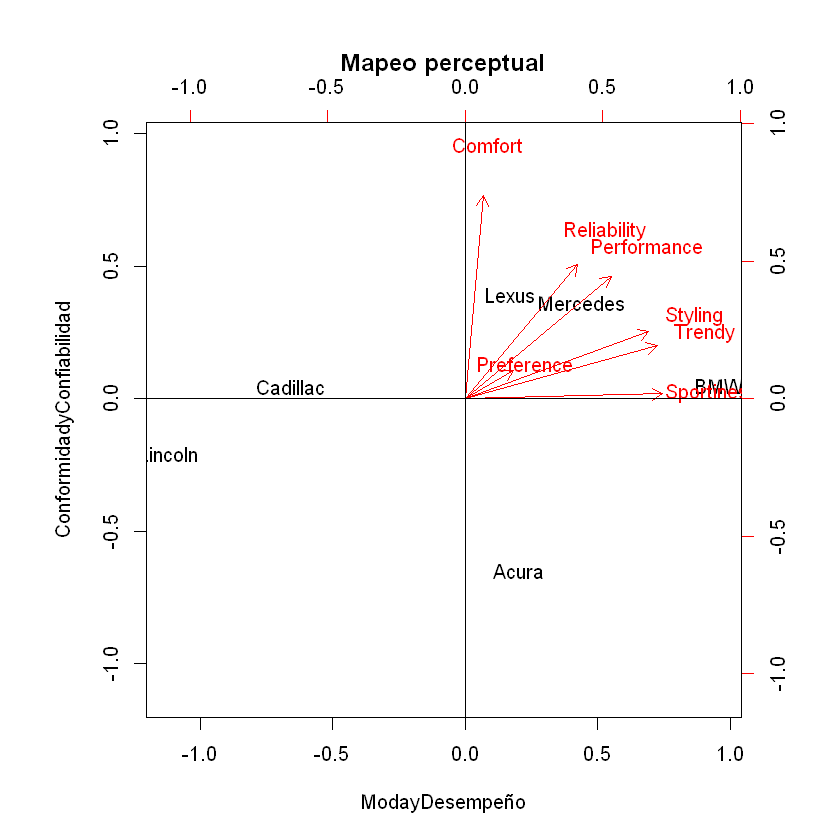

In [14]:
biplot(as.matrix(mean[, 2 : 4 ]), fit$loadings, xlabs=mean$Brand, main = "Mapeo perceptual" )
abline(h= 0 , v= 0 )

## 4.- interpreta el mapa del punto anterior.

Para cada marca de autos podemos sacar que:
- **Mercedes** es la mejor calificada por los encuestados.
- **Lexus** es la segunda mejor calificada pero se inclina más para el confort.
- **BMW** es la tercera mejor pero inclinandose mucho por el tema de la deportividad con ya es sabido.
- **Cadillac** obtiene una puntuación más dominante en el conford y la confiablidad de sus vehículos.
- **Acura** presenta una mejor puntuación en lo que se refiere a moda y el diseño.
- **Lincoln** queda en último lugar en puntuación en todos los apartados.